In [23]:

%load_ext autoreload
%autoreload 2

import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
import pymudokon as pm
import optax

jax.config.update('jax_platform_name', 'cpu')
jax.config.update("jax_enable_x64", True)
import pandas as pd

from jax.scipy.optimize import minimize

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
# d = 1, rhop = 1, e = 0.7, mu = 0, K = 10^3, shear rate = 1
names = ["nu", "p", "s", "T", "I", "CN", "k"]
df_k3 = pd.read_table("./DATA_SS/k1ex.data",sep=" ", skiprows=2,nrows=21, names = names)
df_k4 = pd.read_table("./DATA_SS/k1ex.data",sep=" ", skiprows=26,nrows=21, names = names)
df_k5 = pd.read_table("./DATA_SS/k1ex.data",sep=" ", skiprows=50,nrows=21, names = names)
df_k6 = pd.read_table("./DATA_SS/k1ex.data",sep=" ", skiprows=74,nrows=26, names= names)
df_k7 = pd.read_table("./DATA_SS/k1ex.data",sep=" ", skiprows=103,nrows=21, names= names)
df_k8 = pd.read_table("./DATA_SS/k1ex.data",sep=" ", skiprows=127,nrows=21, names= names)

In [25]:
def df_format(df,d,K):
    df["pstar"] = df["p"]*(d/K)
    df["mu"] = df["s"]/df["p"]

    df["e"] = 1./df["nu"] -1
    return df



df_k3 = df_format(df_k3,d=1,K=10**3)
df_k4 = df_format(df_k4,d=1,K=10**4)
df_k5 = df_format(df_k5,d=1,K=10**5)
df_k6 = df_format(df_k6,d=1,K=10**6)
df_k7 = df_format(df_k7,d=1,K=10**7)
df_k8 = df_format(df_k8,d=1,K=10**8)

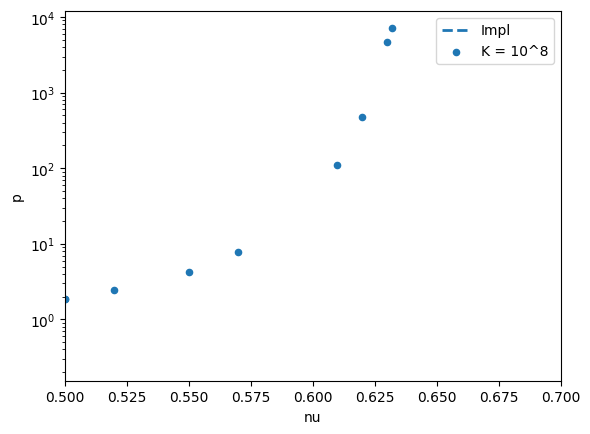

In [53]:
import scipy
import numpy as np
import scipy.optimize



def dilatancy(p, phi, phi_c, I_phi, dgamma_dt, rho_p,d):
    
    term1 = I_phi*np.log(phi_c / phi)
    term2 = (dgamma_dt*d)/jnp.sqrt(p/rho_p)
    return term1 - term2

def jac(p, phi, phi_c, I_phi, dgamma_dt, rho_p,d):
    
    term1 = 0
    term2 = -0.5*(dgamma_dt*d*jnp.sqrt(rho_p))*p**(-1.5)
    # sol = I_phi*np.log(phi_c / phi) - (dgamma_dt*d)/jnp.sqrt(p/rho_p)
    # print(p, phi, phi_c, I_phi, dgamma_dt, rho_p,d)
    return term1 - term2
phi_c =0.634
p_phi=0.9
I_phi= 3.28
rho_p=1
dgamma_dt=1
d=1
# p_phi = 0.33,
# I_phi=0.85,

tol = 1
fig, ax = plt.subplots()
phi_stack = np.arange(0.5,0.7,0.01).astype(jnp.float64)
p_stack = []
for phi in phi_stack:
    # sol = scipy.optimize.fsolve(dilatancy, tol, args=(phi, phi_c, I_phi, dgamma_dt, rho_p,d))
    # p_stack.append(sol[0])
    sol = scipy.optimize.minimize(dilatancy, tol, args=(phi, phi_c, I_phi, dgamma_dt, rho_p,d))
    p_stack.append(sol.x[0])
    

phi_stack = np.array(phi_stack)
# ax.plot(phi_stack, p_stack)
ax.plot(phi_stack, np.nan_to_num(p_stack), ls="--",lw=2, label="Impl")
df_k8.plot(y="p", x="nu", kind="scatter", ax = ax, label="K = 10^8")
ax.set_yscale("log")


ax.set_xlim(0.5,0.7)

ax.legend()